# Data Exploration: Sparks & Rec

First, download and import necessary libraries. 

In [1]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import altair as alt
from IPython.display import display, HTML

Load in the data and look at the first few rows

In [3]:
# v for visits
v = pd.read_csv(r'monthly_vis_by_site_zeroed.csv')
v.head()

,siteid,Name,month,year,years_fire,pre_post_fire,burned,closed_ever,tot_vis,closed_month,d2p
0,CRG_002,Oneonta Gorge,1,2015,-3,pre,yes,yes,169,open,2015-01-15
1,CRG_002,Oneonta Gorge,1,2016,-2,pre,yes,yes,436,open,2016-01-15
2,CRG_002,Oneonta Gorge,1,2017,-1,pre,yes,yes,788,open,2017-01-15
3,CRG_002,Oneonta Gorge,1,2018,0,post,yes,yes,0,closed,2018-01-15
4,CRG_002,Oneonta Gorge,1,2019,1,post,yes,yes,0,closed,2019-01-15


Next, check out each variable in turn. 

"siteid" and "Name' identify the trail/recreation sites. There are 41 sites and each site has 61 rows in the data. 

In [4]:
v['siteid'].nunique()
# siteid - string, 41 unique values

41

In [5]:
v['Name'].nunique()
# Name - string, 41 unique values

41

In [6]:
v['Name'].value_counts()
# appears to be a balanced panel - each site has 61 entries

Oneonta Gorge                         61
Angels rest trail                     61
Latourell Falls                       61
Dog River                             61
Umbrella/Sahalie Falls                61
Surveyors ridge/cooks meadow          61
Eight Mile trail                      61
Cape Horn                             61
Falls Creek Falls                     61
Panther Creek Falls                   61
Weldon Wagon Rd Trail                 61
Lower Deschutes                       61
Mosier Twin Tunnels Trail             61
Klickitat Trail                       61
Starvation Creek area                 61
Washougal River area                  61
Wind Mountain                         61
Dog Creek Falls                       61
Spirit falls                          61
Beacon Rock                           61
Wahkeena Falls                        61
Horsetail Creek                       61
Horsetail Falls                       61
Nesmith Point, McCord, Elowa Falls    61
Munra Falls     

In [7]:
pd.crosstab(v['Name'], v['year'])

year,2014,2015,2016,2017,2018,2019
Name,,,,,,
Angels rest trail,4,12,13,12,12,8
Beacon Rock,4,12,13,12,12,8
Cape Horn,4,12,13,12,12,8
Catherine Creek area,4,12,13,12,12,8
Cherry Orchard FCG trail,4,12,13,12,12,8
Coyote Wall area,4,12,13,12,12,8
Crawford Oaks WDNR,4,12,13,12,12,8
Dog Creek Falls,4,12,13,12,12,8
Dog Mountain/Augspurger Mtn,4,12,13,12,12,8


Looking at the month variable, something weird emerges - looks like month 9 (september) has an extra 41 rows. 

In [8]:
v['month'].value_counts()
# Month runs from 1 to 12, but 9 (September) has 41 more rows

9     246
1     205
2     205
3     205
4     205
5     205
6     205
7     205
8     205
10    205
11    205
12    205
Name: month, dtype: int64

It looks like September 2016 has double the rows of any other month. Also, the data starts in September 2014 and ends in August 2019. 

In [9]:
pd.crosstab(v['month'], v['year'])

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,0,41,41,41,41,41
2,0,41,41,41,41,41
3,0,41,41,41,41,41
4,0,41,41,41,41,41
5,0,41,41,41,41,41
6,0,41,41,41,41,41
7,0,41,41,41,41,41
8,0,41,41,41,41,41
9,41,41,82,41,41,0


To try to figure out what's going on with September 2016, let's look at the head of the data subsetted to that month, sorted by Name. 

In [10]:
sept16 = v[(v["month"]==9) & (v["year"]==2016)]
sept16.head()

,siteid,Name,month,year,years_fire,pre_post_fire,burned,closed_ever,tot_vis,closed_month,d2p
42,CRG_002,Oneonta Gorge,9,2016,-2,pre,yes,yes,3423,open,2016-09-15
43,CRG_002,Oneonta Gorge,9,2016,-1,pre,yes,yes,7177,open,2016-09-15
103,CRG_004,Horsetail Creek,9,2016,-2,pre,yes,yes,73,open,2016-09-15
104,CRG_004,Horsetail Creek,9,2016,-1,pre,yes,yes,188,open,2016-09-15
164,CRG_005,"Nesmith Point, McCord, Elowa Falls",9,2016,-2,pre,yes,yes,648,open,2016-09-15


Seems weird that there's contradictory information on the number of years pre- or post-fire given that this is data from 2016. Check out the crosstab of year and years pre fire:

In [11]:
pd.crosstab(v['year'], v['years_fire'])

years_fire,-3,-2,-1,0,1
year,,,,,
2014,164,0,0,0,0
2015,328,164,0,0,0
2016,0,369,164,0,0
2017,0,0,328,164,0
2018,0,0,0,328,164
2019,0,0,0,0,328


In [12]:
v[(v["month"]==9)].head(20)

,siteid,Name,month,year,years_fire,pre_post_fire,burned,closed_ever,tot_vis,closed_month,d2p
40,CRG_002,Oneonta Gorge,9,2014,-3,pre,yes,yes,1586,open,2014-09-15
41,CRG_002,Oneonta Gorge,9,2015,-2,pre,yes,yes,3948,open,2015-09-15
42,CRG_002,Oneonta Gorge,9,2016,-2,pre,yes,yes,3423,open,2016-09-15
43,CRG_002,Oneonta Gorge,9,2016,-1,pre,yes,yes,7177,open,2016-09-15
44,CRG_002,Oneonta Gorge,9,2017,0,post,yes,yes,0,closed,2017-09-15
45,CRG_002,Oneonta Gorge,9,2018,1,post,yes,yes,0,closed,2018-09-15
101,CRG_004,Horsetail Creek,9,2014,-3,pre,yes,yes,95,open,2014-09-15
102,CRG_004,Horsetail Creek,9,2015,-2,pre,yes,yes,154,open,2015-09-15
103,CRG_004,Horsetail Creek,9,2016,-2,pre,yes,yes,73,open,2016-09-15
104,CRG_004,Horsetail Creek,9,2016,-1,pre,yes,yes,188,open,2016-09-15


For now, assume that the 2016 rows where year_fire==-1 are correct and filter out the 2016 rows where years_fire==-2. 2016 is 1 year prior to the fire, not 2. We'll probably need to contact the research team and revisit why this might be. 

In [13]:
v.drop(v[(v["month"]==9) & (v["year"]==2016) & (v["years_fire"]==-2)].index, inplace = True)
pd.crosstab(v['year'], v['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,0,0,0,0,0,0,0,0,41,41,41,41
2015,41,41,41,41,41,41,41,41,41,41,41,41
2016,41,41,41,41,41,41,41,41,41,41,41,41
2017,41,41,41,41,41,41,41,41,41,41,41,41
2018,41,41,41,41,41,41,41,41,41,41,41,41
2019,41,41,41,41,41,41,41,41,0,0,0,0


Now, we have the right count of years and months in each month. 

Let's check if years_fire and pre_post_fire seem to be correctly coded. First, years_fire is -3 for sept 2014 through aug 2015, -2 for sept 2015 through aug 2016, -1 for sept 2016 through aug 2017, 0 for sept 2017 (the month of the fire) through aug 2018, and 1 for sept 2018 through aug 2019. This looks correct. 

In [14]:
pd.crosstab(v.loc[v['year']==2014, 'years_fire'], v.loc[v['year']==2014, 'month'])

month,9,10,11,12
years_fire,,,,
-3,41,41,41,41


In [15]:
pd.crosstab(v.loc[v['year']==2015, 'years_fire'], v.loc[v['year']==2015, 'month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
years_fire,,,,,,,,,,,,
-3,41,41,41,41,41,41,41,41,0,0,0,0
-2,0,0,0,0,0,0,0,0,41,41,41,41


In [16]:
pd.crosstab(v.loc[v['year']==2016, 'years_fire'], v.loc[v['year']==2016, 'month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
years_fire,,,,,,,,,,,,
-2,41,41,41,41,41,41,41,41,0,0,0,0
-1,0,0,0,0,0,0,0,0,41,41,41,41


In [17]:
pd.crosstab(v.loc[v['year']==2017, 'years_fire'], v.loc[v['year']==2017, 'month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
years_fire,,,,,,,,,,,,
-1,41,41,41,41,41,41,41,41,0,0,0,0
0,0,0,0,0,0,0,0,0,41,41,41,41


In [18]:
pd.crosstab(v.loc[v['year']==2018, 'years_fire'], v.loc[v['year']==2018, 'month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
years_fire,,,,,,,,,,,,
0,41,41,41,41,41,41,41,41,0,0,0,0
1,0,0,0,0,0,0,0,0,41,41,41,41


In [19]:
pd.crosstab(v.loc[v['year']==2019, 'years_fire'], v.loc[v['year']==2019, 'month'])

month,1,2,3,4,5,6,7,8
years_fire,,,,,,,,
1,41,41,41,41,41,41,41,41


pre_post_fire looks to be correct based on years_fire, too. 

In [20]:
pd.crosstab(v['pre_post_fire'], v['years_fire'])

years_fire,-3,-2,-1,0,1
pre_post_fire,,,,,
post,0,0,0,492,492
pre,492,492,492,0,0


Looking at the non-time-varying variables: closed_ever and burned. 

In [21]:
trailssum = v.groupby('Name', as_index=False).first()[['Name', 'burned', 'closed_ever']]
pd.crosstab(trailssum['burned'], trailssum['closed_ever'])

closed_ever,no,yes
burned,,
no,25,8
yes,0,8


In [22]:
trailssum['burned'].value_counts()

no     33
yes     8
Name: burned, dtype: int64

In [23]:
trailssum['closed_ever'].value_counts()

no     25
yes    16
Name: closed_ever, dtype: int64

8 trails burned, and 33 trails did not burn.

16 trails were closed at some point, and 25 trails were never closed. 

All the trails that burned were closed (8 trails), and some of the trails that did not burn were also closed (8 trails).

Next, let's look at the monthly closure patterns of the trails that were closed at some point. 

First, the trails that burned:

In [24]:
closed = v[(v['closed_ever']=="yes") & (v['burned']=="yes")][['siteid', 'd2p', 'closed_month']]
closed = closed.pivot(index='d2p', columns='siteid', values='closed_month')

# Puts the scrollbar next to the DataFrame
display(HTML("<div style='height: 300px; overflow: auto; width: 800px'>" +
             closed.to_html() +
             "</div>"))

siteid,CRG_002,CRG_004,CRG_005,CRG_006,CRG_007,CRG_008,CRG_009,CRG_010
d2p,,,,,,,,
2014-09-15,open,open,open,open,open,open,open,open
2014-10-15,open,open,open,open,open,open,open,open
2014-11-15,open,open,open,open,open,open,open,open
2014-12-15,open,open,open,open,open,open,open,open
2015-01-15,open,open,open,open,open,open,open,open
2015-02-15,open,open,open,open,open,open,open,open
2015-03-15,open,open,open,open,open,open,open,open
2015-04-15,open,open,open,open,open,open,open,open
2015-05-15,open,open,open,open,open,open,open,open


All the trails that burned were closed for the entire observation period following the fire. 

Next, the trails that did not burn:

In [25]:
closed = v[(v['closed_ever']=="yes") & (v['burned']=="no")][['siteid', 'd2p', 'closed_month']]
closed = closed.pivot(index='d2p', columns='siteid', values='closed_month')

display(HTML("<div style='height: 300px; overflow: auto; width: 800px'>" +
             closed.to_html() +
             "</div>"))

siteid,CRG_021,CRG_022,CRG_023,CRG_024,CRG_026,CRG_027,CRG_039,CRG_046
d2p,,,,,,,,
2014-09-15,open,open,open,open,open,open,open,open
2014-10-15,open,open,open,open,open,open,open,open
2014-11-15,open,open,open,open,open,open,open,open
2014-12-15,open,open,open,open,open,open,open,open
2015-01-15,open,open,open,open,open,open,open,open
2015-02-15,open,open,open,open,open,open,open,open
2015-03-15,open,open,open,open,open,open,open,open
2015-04-15,open,open,open,open,open,open,open,open
2015-05-15,open,open,open,open,open,open,open,open


All of the trails that did not burn were eventually opened again. 

Next, investigate the visit counts. First, make sure that the visit counts are zero in each month when the trails are closed: 

In [26]:
v.groupby(['closed_month', 'closed_ever']).agg({'tot_vis': [min, max, 'mean', 'median']})

tot_vis                           
                             min    max         mean median
closed_month closed_ever                                   
closed       yes               0   2271    11.841912    0.0
open         no               17  21134   616.893333  178.0
             yes              19  20346  2013.719477  623.5

Looks like there are some cases where trails are closed but there are estimated visits. Check out these cases:

In [27]:
cwv = v[(v['closed_month']=="closed") & (v['tot_vis'] > 0)]
cwv.head(100)

,siteid,Name,month,year,years_fire,pre_post_fire,burned,closed_ever,tot_vis,closed_month,d2p
222,CRG_006,Munra Falls,8,2019,1,post,yes,yes,2271,closed,2019-08-15
1214,CRG_022,Horsetail Falls,11,2018,1,post,no,yes,116,closed,2018-11-15
1275,CRG_023,Wahkeena Falls,11,2018,1,post,no,yes,303,closed,2018-11-15
1336,CRG_024,Angels rest trail,11,2018,1,post,no,yes,509,closed,2018-11-15
2495,CRG_046,Larch Mountain,11,2018,1,post,no,yes,22,closed,2018-11-15


Assume that these visit counts should be zero. 

MAY WANT TO REVISIT THIS! Ask the research team. 

In [29]:
v.loc[(v["closed_ month"] == "closed"), "tot_vis"] = 0
v.groupby(['closed_month', 'closed_ever']).agg({'tot_vis': [min, max, 'mean', 'median']})

tot_vis                           
                             min    max         mean median
closed_month closed_ever                                   
closed       yes               0      0     0.000000    0.0
open         no               17  21134   616.893333  178.0
             yes              19  20346  2013.719477  623.5

Histogram of visit counts

<AxesSubplot:>

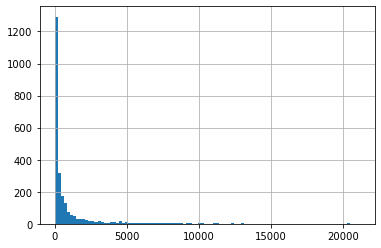

In [40]:
# in all months
v['tot_vis'].hist(bins=100)

<AxesSubplot:>

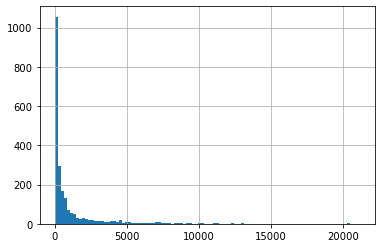

In [41]:
# in months where there were some number of visits - still very skewed
vnonzero = v[v['tot_vis']>0]
vnonzero['tot_vis'].hist(bins=100)

# Exploring different ways to visualize visit counts

### Plot all visits 
This plot has a ton of overplotting but you can see the seasonality, which is cool.

In [42]:
chart = alt.Chart(v)
alt.Chart(v).mark_line().encode(
    x = 'd2p',
    y = 'tot_vis',
    color = 'Name'
)

alt.Chart(...)

### Look at trends just for trails that closed but opened again at some point
This vis isn't super informative because you can't easily compare across years - but it could be interesting to do something with these trails.

In [48]:
vnbc = v[(v['closed_ever']=="yes") & (v['burned']=="no")]
chart = alt.Chart(vnbc)
alt.Chart(vnbc).mark_line().encode(
    x = 'd2p',
    y = 'tot_vis',
    color = 'Name'
)

alt.Chart(...)

### How were the distribution of visits in each month different in pre- vs. post-fire years?

This is obviously not good yet (still lots of overplotting and impossible to see what's going on) but I could envision some future iteration of it working -- showing the timeline compared to the fire on the x-axis and plotting each month separately to account for seasonality. 

We could:
-use violin plots or boxplots to show the distribution of visitors across all the trails before and after the fire 
-collapse to the mean across all trails in each month 

In [47]:
alt.Chart(v).mark_point().encode(
    x='years_fire',
    y='tot_vis'
).properties(
    width=180,
    height=180
).facet(
    facet='month',
    columns=2
)

alt.FacetChart(...)

### Visualize changes in visits relative to pre-fire years

This graph shows the difference between visits in a given month post-fire and that same month before the fire in September 2017 (e.g., October 2017 vs. October 2016; January 2018 vs. January 2017). I've divided the graphs into areas that were burned vs. not (columns) and closed in the month in question vs. not (rows). 

I think a version of this approach has promise, though it's obviously not good yet...

In [76]:
chg = v[(v['years_fire']==-1) | (v['years_fire']==0)]
chg = chg[['siteid', 'month', 'pre_post_fire', 'burned', 'closed_ever', 'closed_month', 'tot_vis']]
chg['diff'] = chg.groupby(['siteid', 'month', 'burned', 'closed_ever'])['tot_vis'].diff()

alt.Chart(chg).mark_point().encode(
    x='month',
    y='diff'
).properties(
    width=180,
    height=180
).facet(
    column='burned', 
    row='closed_month'
)

alt.FacetChart(...)

In [92]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
sepmonths = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]


v['sepmonths'] = v['month'].replace(months, sepmonths)
v.head()
monthmean = v.groupby(['sepmonths', 'year', 'years_fire', 'pre_post_fire', 'burned', 'closed_month'], as_index=False).agg({
    'tot_vis' : ['mean', 'sum']
}
)
monthmean.columns = ["_".join(x) for x in monthmean.columns.ravel()]
monthmean.head()

C:\Users\stlp\AppData\Local\Temp/ipykernel_15916/2517423066.py:10: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  monthmean.columns = ["_".join(x) for x in monthmean.columns.ravel()]


,sepmonths_,year_,years_fire_,pre_post_fire_,burned_,closed_month_,tot_vis_mean,tot_vis_sum
0,1,2014,-3,pre,no,open,313.666667,10351
1,1,2014,-3,pre,yes,open,500.125000,4001
2,1,2015,-2,pre,no,open,628.636364,20745
3,1,2015,-2,pre,yes,open,1508.875000,12071
4,1,2016,-1,pre,no,open,910.060606,30032


In [99]:
alt.Chart(monthmean).mark_line().encode(
    x='sepmonths_',
    y='tot_vis_mean',
    color='year_'
).properties(
    width=180,
    height=180
).facet(
    column='burned_', 
    row='closed_month_'
)

alt.FacetChart(...)

As with all of the above (haha - sorry!!!!) this also has a ton of problems. But maybe you can see what I was trying to do - have the months along the x-axis, starting in September. Then, compare the seasonal trajectories of pre-fire years (2014-2016) to post-fire years (2017 on - and especially focusing on 2017). 

**Warning:** big things I didn't get to: 1) figuring out how to change the colors of "year" so it's a categorical scale 2) filtering out 2014 and 2019, which I think are just distracting  3) figuring out how to deal with trail closures and 4) adjusting the year demarcation so that the years represent "September-September" years rather than Jan-Dec years.

Here's the same graph for the *sum* of visits rather than the mean:

In [101]:
alt.Chart(monthmean).mark_line().encode(
    x='sepmonths_',
    y='tot_vis_sum',
    color='year_'
).properties(
    width=180,
    height=180
).facet(
    column='burned_', 
    row='closed_month_'
)

alt.FacetChart(...)